# Aufgabe 2: Maximum und Minimum finden
Bei einfachen Verfahren zur Bildverarbeitung wird auf jedem Bildpunkt ein einzelner Verarbeitungsschritt ausgeführt. Auch die Suche nach dem maximalen und minimalen Grauwert eines Bildes kann als ein solches Verfahren aufgefasst werden.

Programmieren Sie ein Verfahren, das *jedes* Pixel eines Bildes betrachtet und dabei Maximum und Minimum eines Bildes bestimmt!
Geben Sie die jeweiligen Koordinaten und deren Grauwerte aus! Markieren Sie diese Punkte gegenbenenfalls im Bild!
Im Ordner `Bilder` finden Sie einige Beispielbilder. Testen Sie Ihre Routinen mit diesen Bildern!

Welche alternativen Vorgehensweisen wären zur Realisierung dieser Funktionalität denkbar?

## Antwort
Man könnte einfach die bereits implementierten Funktionen von numpy benutzen.

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio
import numpy as np

Bitte ändern Sie die untenstehende Zeile nicht! Zur Korrektur müssen die Dateien über diesen Pfad erreichbar sein.

In [2]:
image_filter = 'Bilder/*.jpg'

## 1. Laden der Bilder
Diesmal sollen mehrere Bilder geladen werden. Zum Auffinden der Bilder soll der oben angegebene Filter `image_filter` eingesetzt werden. Das Paket `glob` hilft dabei, alle Pfade zu ermitteln, die zum Filter passen. Anschließend können die Bilder einzeln durch `imageio` eingelesen werden. Zum Schluss sollten sich alle Bild in einer Liste `images` befinden.

In [3]:
images = [imageio.imread(image) for image in glob.glob(image_filter)]

## 2. Bestimmen von Maximum und Minimum
Definieren Sie eine Funktion `ex1_min_max`, die ein Bild übergeben bekommt. Die Funktion soll den maximalen und den minimalen Grauwert sowie die jeweiligen Koordinaten zurückgeben. Gehen Sie dazu Pixel für Pixel durch das Bild und geben Sie anschließend alle Werte als Tupel zurück.

In [4]:
def ex1_min_max(image):
    # initiate min and max values and coords
    image_min_x = 0
    image_min_y = 0
    image_min = image[image_min_x, image_min_y]
    image_max_x = 0
    image_max_y = 0
    image_max = image[image_max_x, image_max_y]
    # iterate through all the pixels in the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # adjust min values and coords
            pixel = image[x, y]
            if pixel < image_min:
                image_min = pixel
                image_min_x = x
                image_min_y = y
            # adjust max values and coords
            if pixel > image_max:
                image_max = pixel
                image_max_x = x
                image_max_y = y

    return image_min, image_min_x, image_min_y, image_max, image_max_x, image_max_y


## 3. Darstellen des Bildes

Wählen Sie eines der Bilder aus der Liste `images` zufällig aus. Verwenden Sie dazu eine Funktion aus dem Paket `numpy`.

In [5]:
image = np.random.choice(images)

/tmp/ipykernel_8396/3477574057.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image = np.random.choice(images)


Funktion zur Ermittlung von Maximum und Minimum verwenden:

In [6]:
image_min, image_min_x, image_min_y, image_max, image_max_x, image_max_y = ex1_min_max(image)

Geben Sie Maximum und Minimum schön formatiert aus, indem Sie String-Interpolation verwenden.

In [7]:
print(f"Minimum at\tx={image_min_x},\t{image_min_y}:\t{image_min}\nMaximum at\tx={image_max_x},\t{image_max_y}:\t{image_max}")

Minimum at	x=0,	0:	0
Maximum at	x=3,	219:	255


Verwenden Sie `matplotlib.pyplot`, um das Bild anzuzeigen. Zeichnen Sie außerdem die Position von Minimum und Maximum ein.

<IPython.core.display.Javascript object>


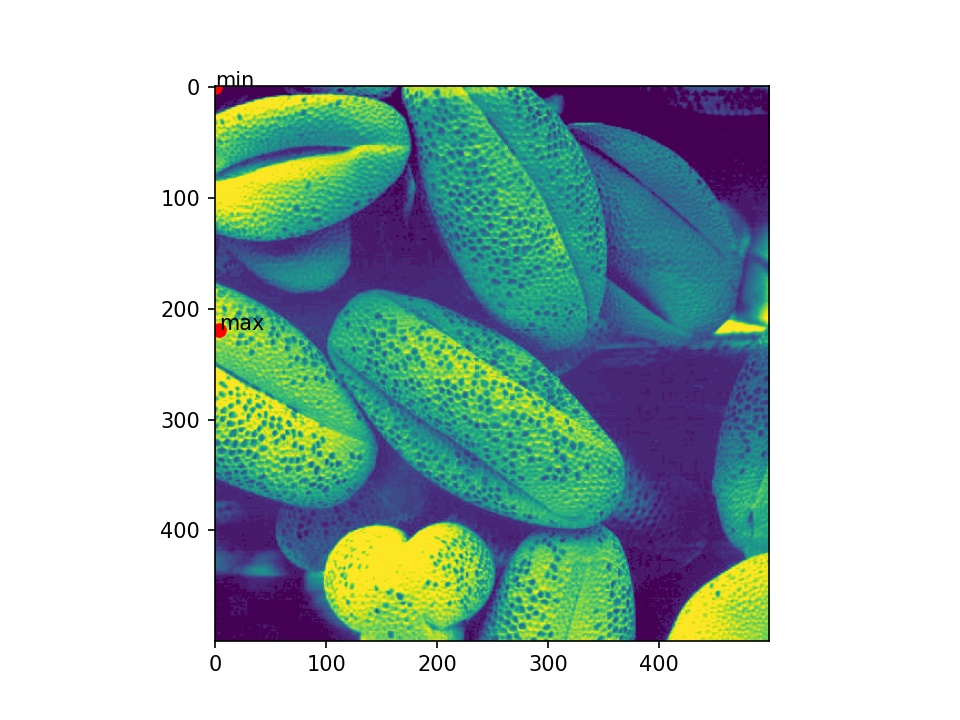

In [8]:
plt.imshow(image)
plt.plot(image_min_x, image_min_y, marker='o', color="red")
plt.annotate("min", (image_min_x, image_min_y))
plt.plot(image_max_x, image_max_y, marker='o', color="red")
plt.annotate("max", (image_max_x, image_max_y))
plt.show()